In [1]:
import modal, lab, sampler
from models import BiLSTM, BiRNN
import numpy as np
import matplotlib.pyplot as plt
import torch
import scienceplots
import pints

In [2]:
# Matplotlib style
plt.style.use('science')
plt.rcParams.update({"font.size":13})

In [3]:
# Load the model
model = torch.load('./Models/final_model.pth')

Note that the sampler is only configured to handle outputs of 0 or 1 (i.e. multiclass model information is not used). If a multiclass model is used ,as is here, the code will treat it as a single class model.

### Preliminary Testing

In [4]:
w = np.linspace(0, 1,200)
w_n = [0.25, 0.5, 0.8]
a_n = [0.7, 1.5, 1.0]
z_n = [0.1, 0.15, 0.1]
logsigma = np.log(0.15)
theta = np.append(np.array([w_n, a_n, z_n]).flatten(), logsigma) # true parameters

In [5]:
tf, y = modal.modal_sum(w, a_n, z_n, w_n, logsigma=logsigma)

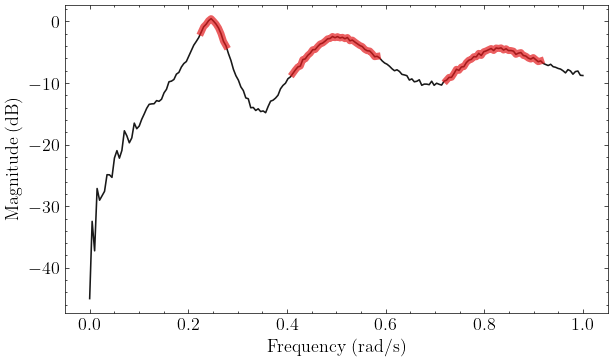

100%|██████████| 400/400 [00:01<00:00, 393.29it/s]

(400, 500, 10)


In [6]:
# Run a sampler
test = sampler.Sampler(model, tf, w=None)
test.run_sampler(nwalkers=500, nsteps=400, sampler="emcee", prior="uniform", return_results=True, phase=False, max_opt_its=200, multi_output=False)

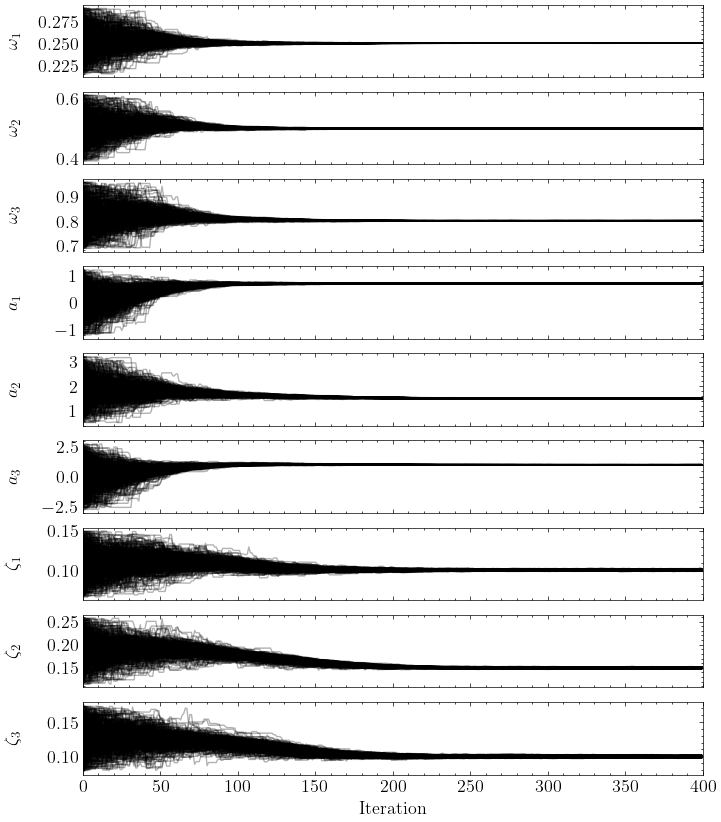

In [7]:
test.plot_state_evolution(figsize=(8,10),ypos=-0.1)

In [8]:
# burn-in first 200 samples
test.burn_in(200)

(100000, 10)


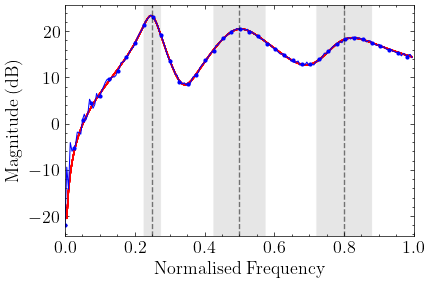

In [9]:
test.plot_posterior_samples(figsize=(4.5,3), ws=w_n, y=y)

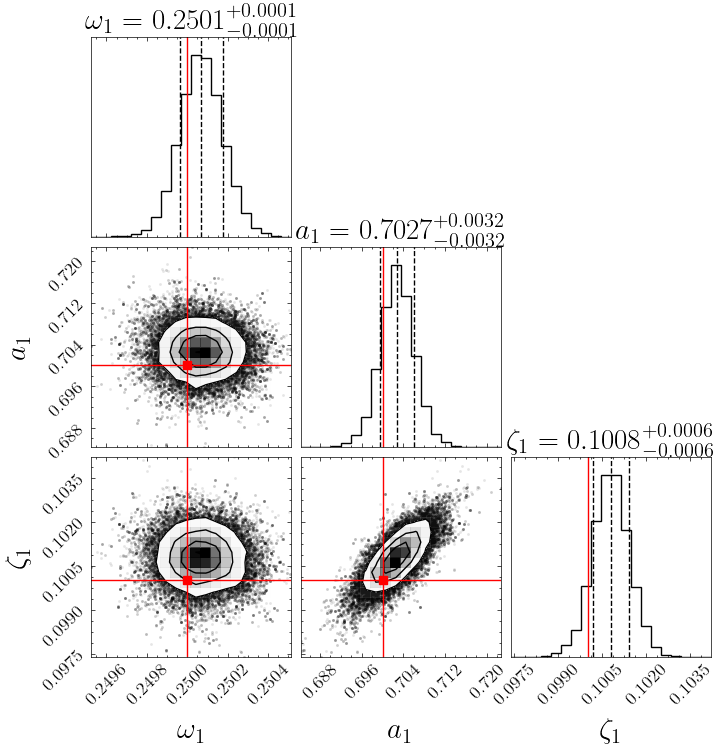

In [10]:
# plot a corner plot of the first mode
test.plot_corner(mode_num=1, truths=theta, figsize=(10,10))

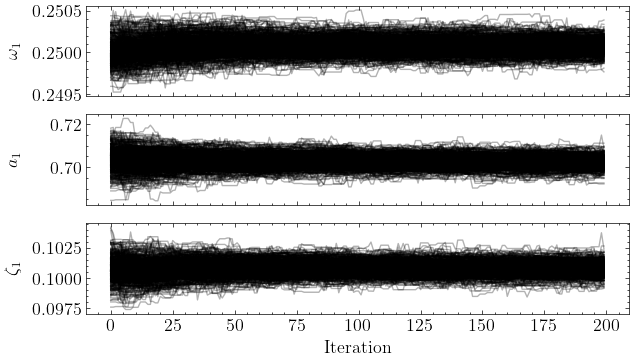

In [11]:
test.plot_state_evolution(mode_num=1, figsize=(7,4),ypos=-0.12,)

### 3C6

In [13]:
tf_3c6, w_3c6 = lab.load_sampling_data(cutoff=3000)

2024-07-01 21:55:49.584 python[64353:12002524] +[CATransaction synchronize] called within transaction


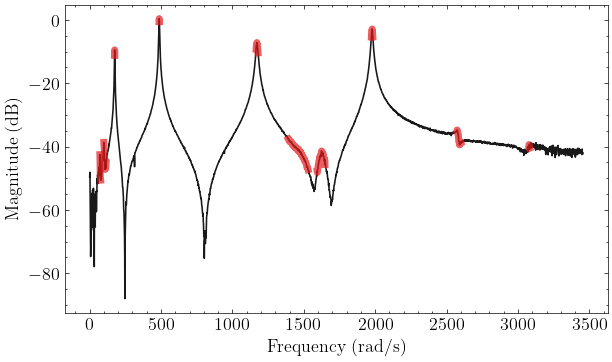

Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 14
Iter. Eval.  Best      Current   Time m:s
0     14     -10188.74 -10188.74   0:00.0
1     28     -10088.96 -10088.96   0:00.0
2     42     -10085.23 -10085.23   0:00.1
3     56     -10085.23 -10094.61   0:00.1
20    294    -9904.902 -9985.439   0:00.2
40    574    -9749.112 -9922.499   0:00.3
60    854    -9595.754 -9651.875   0:00.4
80    1134   -9498.134 -9501.293   0:00.5
100   1414   -9305.152 -9322.187   0:00.6
120   1694   -8985.185 -9033.445   0:00.7
140   1974   -8675.839 -9077.02    0:00.8
160   2254   -8626.986 -8626.986   0:00.9
180   2534   -8378.163 -8453.334   0:01.0
200   2814   -8156.556 -8258.587   0:01.1
220   3094   -8009.413 -8163.226   0:01.2
240   3374   -8009.413 -8092.568   0:01.3
260   3654   -8009.413 -8072.318   0:01.4
280   3934   -7980.276 -7999.484   0:01.5
300   4214   -7915.202 -7962.833   0:01.6
320   4494   -7845.92  -7865.16

In [16]:
s = sampler.Sampler(model, tf_3c6, w_3c6)
s.run_sampler(nwalkers=100, nsteps=10000, sampler="pints", pints_sampler = pints.EmceeHammerMCMC, return_results=True, phase=False, max_opt_its=8000)

In [17]:
s.burn_in(3000)

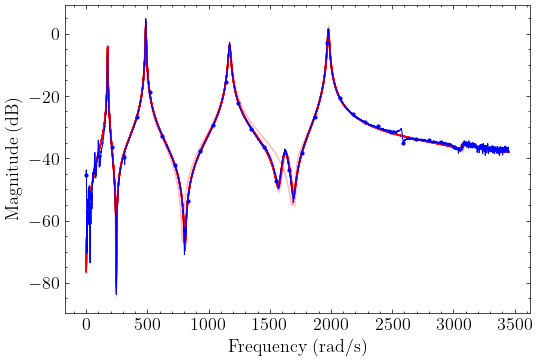

In [19]:
s.plot_posterior_samples(markevery=90, figsize=(6,4))

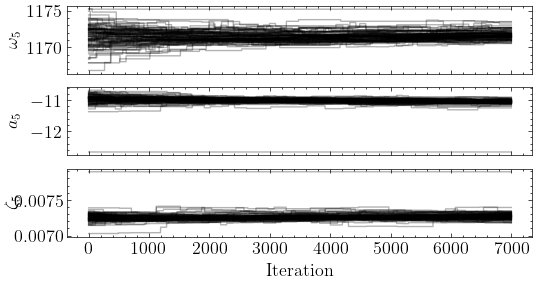

<Figure size 600x600 with 0 Axes>

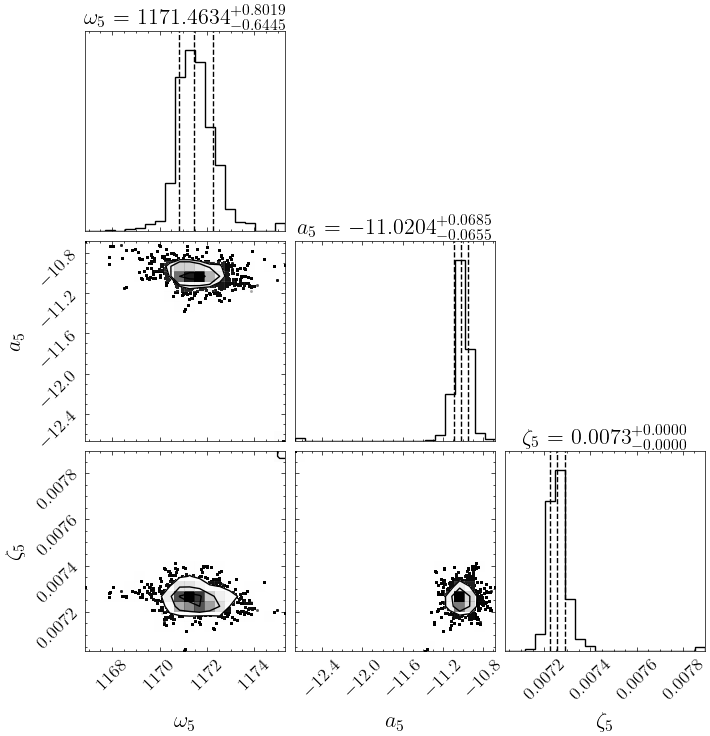

<Figure size 600x600 with 0 Axes>

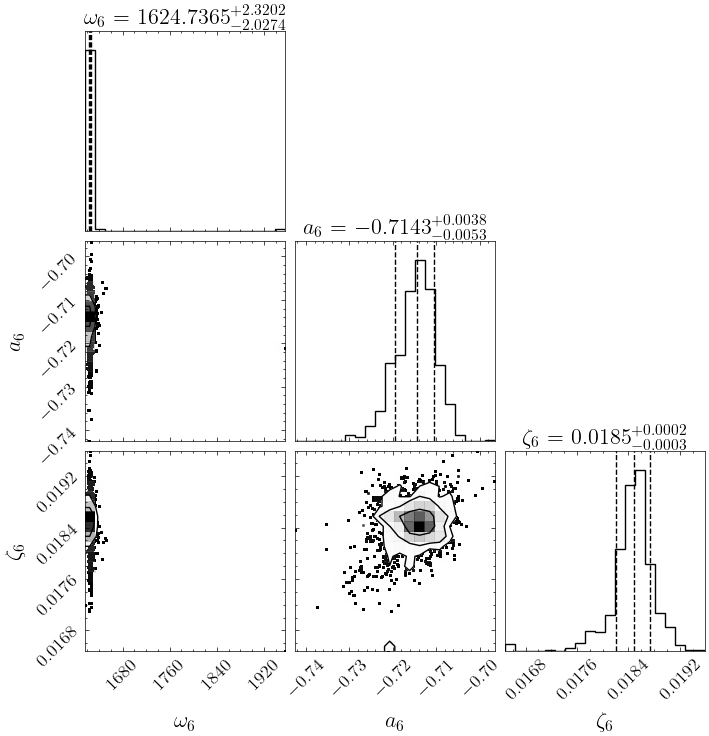

In [20]:
s.plot_state_evolution(mode_num=5)
s.plot_corner(mode_num=[5,6])  

#### Now try estimate the phase also (complex modal amplitudes)

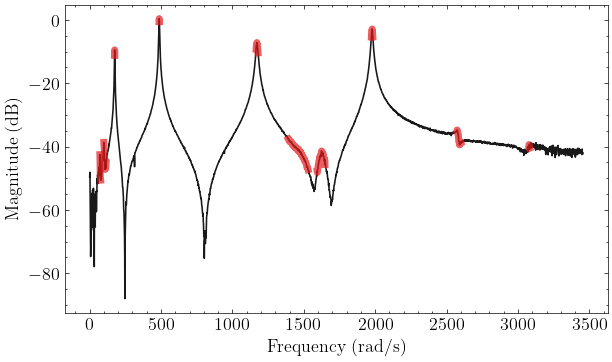

Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 15
Iter. Eval.  Best      Current   Time m:s
0     15     -100345.2 -100345.2   0:00.0
1     30     -85531.61 -85531.61   0:00.0
2     45     -77460.1  -77460.1    0:00.0
3     60     -69038.16 -69038.16   0:00.0
20    315    -20011.5  -20011.5    0:00.1
40    615    -10404.63 -10404.63   0:00.3
60    915    -9544.985 -9749.108   0:00.4
80    1215   -9445.659 -9755.215   0:00.5
100   1515   -9445.659 -9569.5     0:00.7
120   1815   -9392.461 -9392.461   0:00.8
140   2115   -9211.698 -9301.153   0:00.9
160   2415   -9144.247 -9224.742   0:01.1
180   2715   -9014.877 -9135.951   0:01.2
200   3015   -8817.577 -8916.13    0:01.3
220   3315   -8817.577 -9131.406   0:01.5
240   3615   -8749.201 -8979.735   0:01.6
260   3915   -8749.201 -8903.767   0:01.7
280   4215   -8729.745 -8779.106   0:01.9
300   4515   -8703.345 -8867.436   0:02.0
320   4815   -8696.467 -8696.46

In [25]:
s_phase = sampler.Sampler(model, tf_3c6, w_3c6)
s_phase.run_sampler(nwalkers=100, nsteps=10000, sampler="pints", pints_sampler = pints.EmceeHammerMCMC, return_results=True, phase=True, max_opt_its=8000)

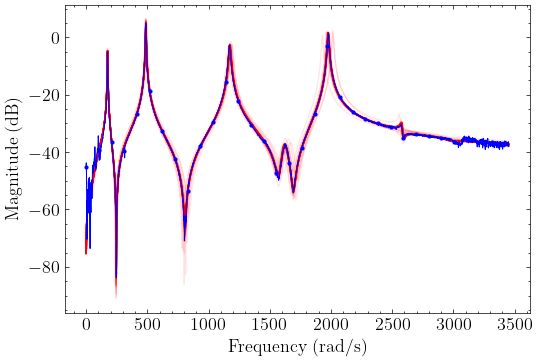

In [26]:
# before burn-in
s_phase.plot_posterior_samples(markevery=90, figsize=(6,4)) 

In [27]:
s_phase.burn_in(3000)

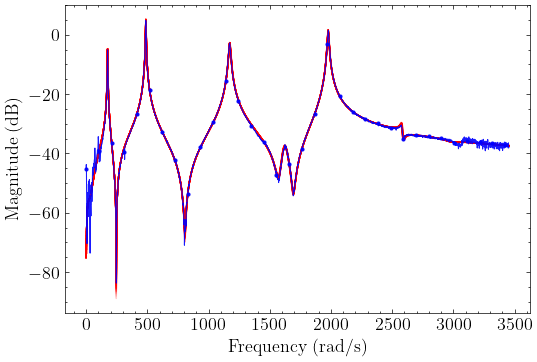

In [28]:
# after burn-in
s_phase.plot_posterior_samples(markevery=90, figsize=(6,4), tf_alpha=0.9) 

## 4C6

In [4]:
tf_dict, waxis_4c6 = lab.load_sampling_data(cutoff = 2300, tf_type="acc", num_tfs=12)

2024-07-01 22:21:53.474 python[66615:12032744] +[CATransaction synchronize] called within transaction


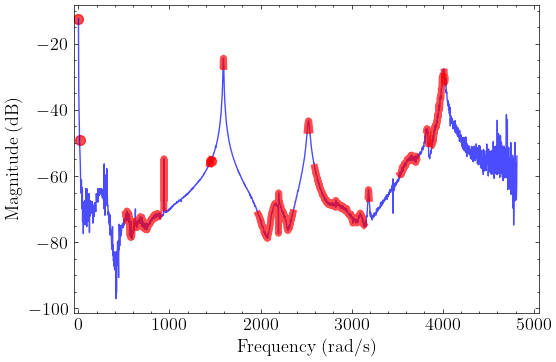

(<Figure size 600x400 with 1 Axes>,
 <Axes: xlabel='Frequency (rad/s)', ylabel='Magnitude (dB)'>)

In [5]:
# Alternative method to plot lab transfer function predictions
modal.plot_tf(tf_dict['tf_4'], y=None, w=waxis_4c6, model=model, X=lab.extend_lab_tf(tf_dict['tf_4'], max_norm=True), figsize=(6,4))

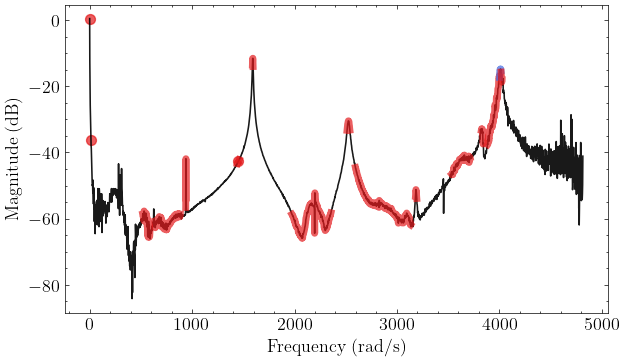

Maximising LogPDF
Using Covariance Matrix Adaptation Evolution Strategy (CMA-ES)
Running in sequential mode.
Population size: 15
Iter. Eval.  Best      Current   Time m:s
0     15     -32714.39 -32714.39   0:00.0
1     30     -32516.06 -32516.06   0:00.0
2     45     -32334.09 -32334.09   0:00.0
3     60     -31999.95 -31999.95   0:00.0
20    315    -27417.6  -27417.6    0:00.2
40    615    -16948.23 -16948.23   0:00.3
60    915    -10428.39 -10428.39   0:00.5
80    1215   -8477.934 -9371.143   0:00.6
100   1515   -7700.841 -8301.095   0:00.8
120   1815   -7539.118 -7991.27    0:00.9
140   2115   -7420.061 -7443.599   0:01.1
160   2415   -7245.196 -7474.483   0:01.2
180   2715   -7227.33  -7257.394   0:01.4
200   3015   -7186.166 -7251.62    0:01.5
220   3315   -7172.058 -7256.382   0:01.7
240   3615   -7172.058 -7290.664   0:01.8
260   3915   -7104.488 -7131.465   0:02.0
280   4215   -7083.821 -7153.911   0:02.1
300   4515   -7056.988 -7099.139   0:02.3
320   4815   -7056.988 -7137.01

In [8]:
s_4c6 = sampler.Sampler(model, tf_dict['tf_4'], waxis_4c6)
s_4c6.run_sampler(nwalkers=100, nsteps=9000, sampler="pints", pints_sampler = pints.EmceeHammerMCMC, max_opt_its=6000, return_results=True, phase=False)

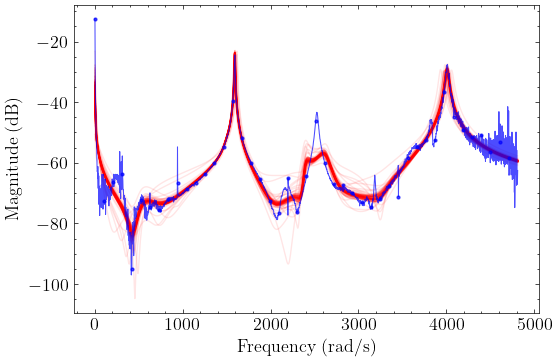

In [9]:
s_4c6.plot_posterior_samples(tf_alpha=0.7, markevery=50, figsize=(6,4)) #, name='final_4c6'

In [10]:
s_4c6.burn_in(3000)

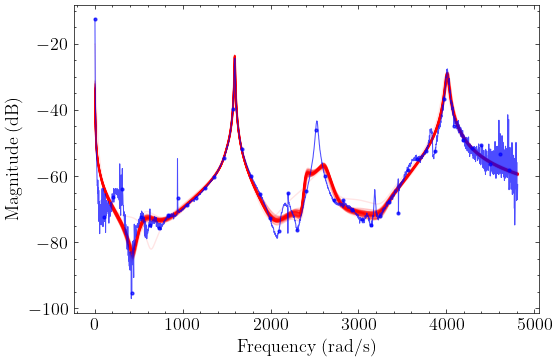

In [11]:
s_4c6.plot_posterior_samples(tf_alpha=0.7, markevery=50, figsize=(6,4)) #, name='final_4c6'

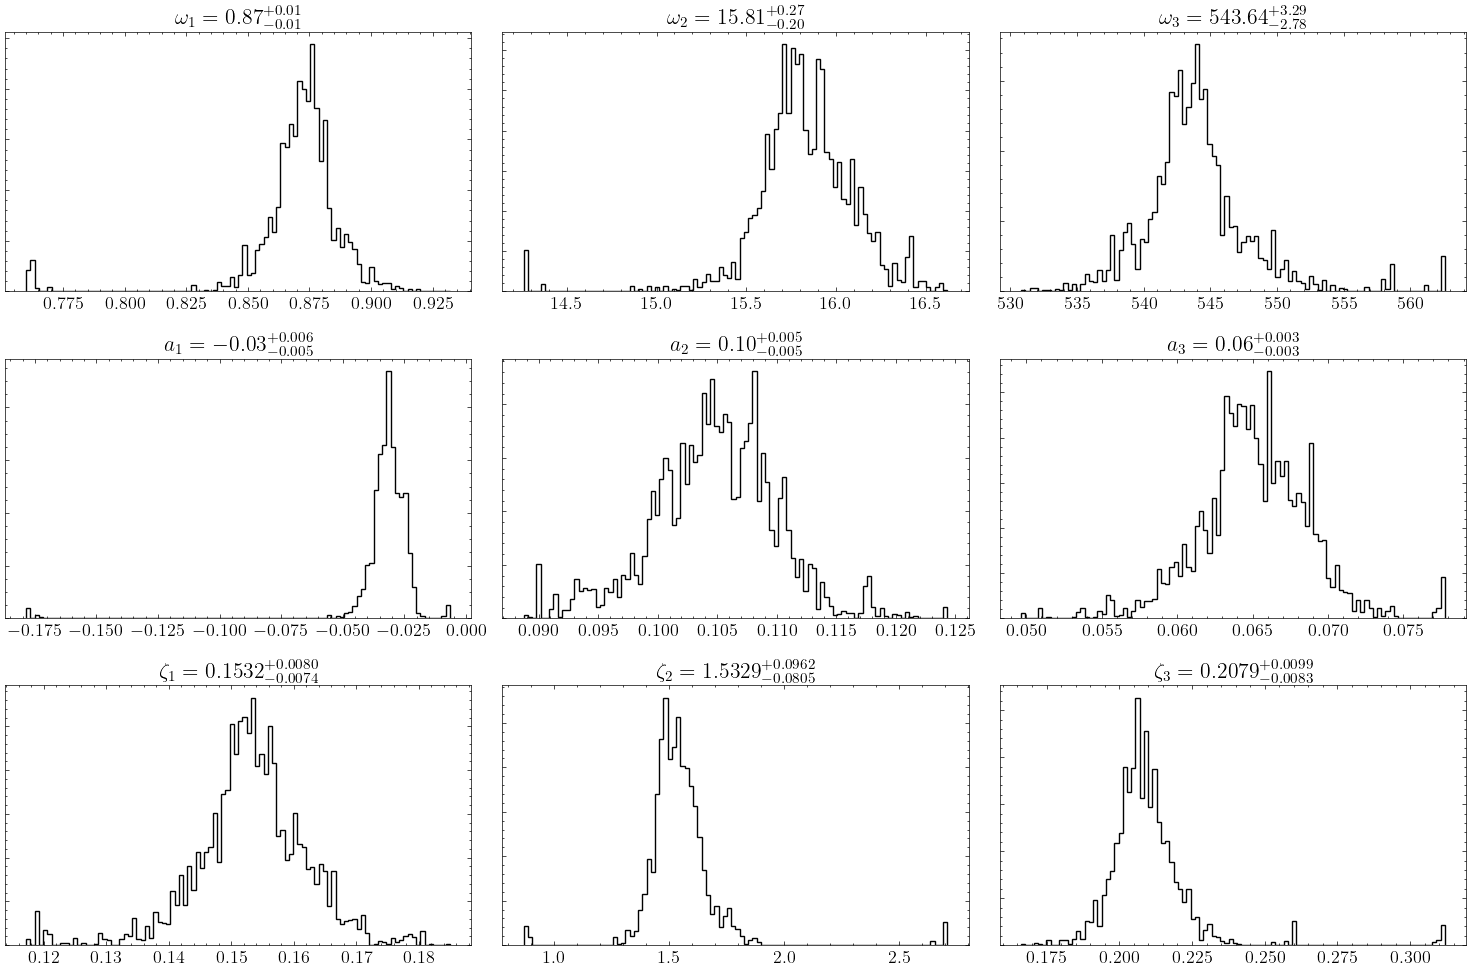

In [12]:
# plot histogram of samples of first three modes
s_4c6.plot_hist(num_modes=3)

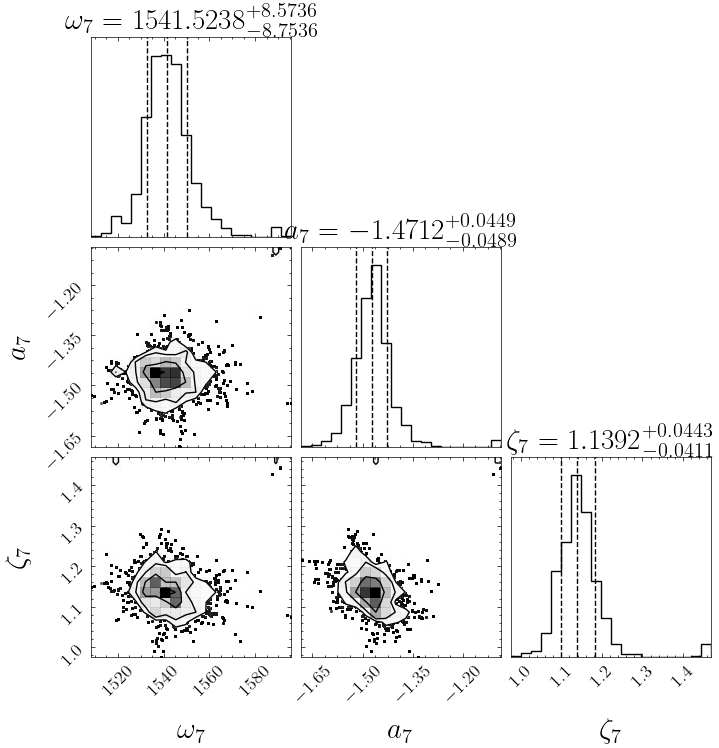

In [13]:
s_4c6.plot_corner(mode_num=7, figsize=(10,10))